# I. Introduction and preparation
This file loads and compares the tuned models for different age groups' data as shown in the folder `Model Training`. The functions used for generating texts here are imported from a separate file (**text_generator.py**), which has two parts:
- Function `interactive_text` takes user's input text when executed. While it's not used in the comparison part of this notebook, it's intended to be used by anyone who's interested in trying out the codes in the notebook.
- Function `text_generator`, which is essentially the same function as the ones in the model training notebooks.

Note: one of the input required for the text generator functions (as shown in the second coding cell) is the max_sequence_len of the corresponding model, which can be found in the three training notebooks with the prefix (3.x).

In [1]:
import json
import sys
sys.path.append('Other')

import pandas as pd
pd.set_option('precision', 2)
pd.set_option("max_rows", 5)

import scipy.stats as stats
import numpy as np
import math

from keras_preprocessing.text import tokenizer_from_json
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

# Import two python files made for this assignment
from text_generator import interactive_text, text_generator
from text_analyse import text_analyse

import warnings
warnings.filterwarnings("ignore")

# II. Load tokenizers and model weights

In [2]:
# For the under-20 group:
with open('Model Training/Under_20 Model Training/tokenizer.json') as f:
    data = json.load(f)
    tokenizer_20 = tokenizer_from_json(data)

model_20 = tf.keras.models.load_model('Model Training/Under_20 Model Training/model_weights2.hdf5')

In [3]:
# For the 20-30 group:
with open('Model Training/2030 Model Training/tokenizer.json') as f:
    data = json.load(f)
    tokenizer_2030 = tokenizer_from_json(data)

model_2030 = tf.keras.models.load_model('Model Training/2030 Model Training/model_weights2.hdf5')

In [4]:
# For the above-30 group:
with open('Model Training/Above_30 Model Training/tokenizer.json') as f:
    data = json.load(f)
    tokenizer_30 = tokenizer_from_json(data)

model_30 = tf.keras.models.load_model('Model Training/Above_30 Model Training/model_weights2.hdf5')

In [5]:
models = [model_20, model_2030, model_30]
tokenizers = [tokenizer_20, tokenizer_2030, tokenizer_30]
max_seq = [35, 36, 35]

# III. Generate text using `interactive_text` (demo)

In [6]:
text_0 = interactive_text(models, tokenizers, max_seq)

Please input the number label of the model that you wish to use for generating text
(1: Model of under 20; 2: Model of between 20 and 30; 3: Model of above 30)2
Please input some words that you want to start the block of text with (in lower case):she woke up late
Please input the number of words you wish to generate:30
                     --------------------------------------                     
                      Please see below for texts generated                      
                     --------------------------------------                     
she woke up late so i dont see the question than that there was no patriarchy camera into which we was sitting all taking out since we had a gig early the next morning


# IV. Model comparison
In this section, three tests will be carried out to compare the texts generated by the three models. As the first example is enough to show their differences, one can choose to skip the 2nd and the 3rd test examples.
## i. Test #1: using "he could not find the keys" as the start of text

In [7]:
print('Text generated by the model for under 20:')
print(text_generator('he could not find the keys', 30, tokenizer_20, model_20, 35))

Text generated by the model for under 20:
he could not find the keys or of their afraid in trinity usual alone but wear smell of all of us got go back to already other say because we were keep hes and hours back


In [8]:
print('Text generated by the model for between 20 and 30:')
print(text_generator('he could not find the keys', 30, tokenizer_2030, model_2030, 36))

Text generated by the model for between 20 and 30:
he could not find the keys remedy that corresponds to you will be jailed for not bringing me to me at the price of the course of the second blew up the hole will at rooms


In [9]:
print('Text generated by the model for above 30:')
print(text_generator('he could not find the keys', 30, tokenizer_30, model_30, 35))

Text generated by the model for above 30:
he could not find the keys around and was in the midst of a bad idea of any other quiet as well as picking up on during the summer to process the catch dream and are


## ii. Test #2: using "she had no choice" as the start of text

In [10]:
print('Text generated by the model for under 20:')
print(text_generator('she had no choice', 30, tokenizer_20, model_20, 35))

Text generated by the model for under 20:
she had no choice write because i was wanted for the hey should stop show and i've due who after well couldn't of pictures of his anime is nothing to day this but then


In [11]:
print('Text generated by the model for between 20 and 30:')
print(text_generator('she had no choice', 30, tokenizer_2030, model_2030, 36))

Text generated by the model for between 20 and 30:
she had no choice of a company that he said its a good friend of the year and a bag on a bad way i don't care for pink and specifically i'm not crazy


In [12]:
print('Text generated by the model for above 30:')
print(text_generator('she had no choice', 30, tokenizer_30, model_30, 35))

Text generated by the model for above 30:
she had no choice that you have an appointment for the same day at the same time as it was damn started up again and sleep at my friend's house on the time i


## iii. Test #3: using "it was a very sunny day" as the start of text

In [13]:
print('Text generated by the model for under 20:')
print(text_generator('it was a very sunny day', 30, tokenizer_20, model_20, 35))

Text generated by the model for under 20:
it was a very sunny day a blog its but i was like passengers so i had to wonderful my clap downs that the three but i was looking cos to art out with my ago


In [14]:
print('Text generated by the model for between 20 and 30:')
print(text_generator('it was a very sunny day', 30, tokenizer_2030, model_2030, 36))

Text generated by the model for between 20 and 30:
it was a very sunny day trip and so he took up to spend my time and was something i was too harsh time to move out to go back and watched the world of humor


In [15]:
print('Text generated by the model for above 30:')
print(text_generator('it was a very sunny day', 30, tokenizer_30, model_30, 35))

Text generated by the model for above 30:
it was a very sunny day here watching the race before row post itself promoting standing at the stadium than anywhere else at both sweat things through them as a little more browsing who knows to


## iv. Initial analysis of texts in Part IV

From the three examples above, it can be seen that:

Compared to the other two models, the model trained on texts written by people under 20 seems to have poorer performance. It can be reflected in its lack of sentence structure (many times even lack of phrase structure) and lack of context. In contrast, the other two models are able to output partial sentences. One possible explanation is that the sample data of the blogs written by people under 20 covers topics and genres of more variety than the others. Upon our initial inspection of the raw data, we did discover that there are many forms of the blogs of the under-20 age group; for example, some blogs seem to have structures of a survey that consists of very short phrases and informal sentences.
    
Meanwile, there seems to be no distinct features when we compare the texts output by the three models, which is contrary to our original expectation (by splitting the data according three age groups and training separate models for them, we were hoping to see if the models can output texts of different styles that reflect their corresponding age groups). As will be discussed below, one reason for this could be that the training size we use is still relatively small.

# V. Further analysis regarding text readability

As it is difficult to directly compare the texts generated by the three models to find out their differences, we decide to perform several readability tests on them before we draw further conclusions. In this part, the `text_analyse` function imported from **text_analyse.py** will be used, which essentially outputs scores for the text's readability using different standards.

In short, the `text_analyse` takes a list of texts as input and output a dataframe that stores the scoring from the different standards. One of the constraints of these tests is that they require the input texts to be punctuated. As our models are not able to incorporate punctuations, the input texts here are **manually punctuated** by us, which is part of the reason why the sample size of the texts is very small (only 10 pieces of texts of around 100 words for each model). These texts are generated using the same function throughout the project and therefore we decide not to document it with another notebook.

Since the detailed descriptions of these readability tests are not important here, please refer to https://pypi.org/project/textstat/ for further information.

## i. Readability test results

In [16]:
file = open("Other/under_20_seed.txt", "r")
lines_20 = file.readlines()

# Perform text analysis using packages from textstat
df_20 = text_analyse(lines_20)
df_20 = df_20.apply(lambda x: round(x, 2))
display(df_20.style.apply(lambda x: ["background-color: "
                                     "yellow" if 5.88 == v else "" for v in x
                                    ], axis = 1))

,fre,smog,fkg,cli,ari,dcrs,dw,lwf,gf,t_std
0,104.84,5.60,0.80,1.59,0.80,0.92,3,3.59,3.93,1.00
1,93.95,3.10,2.90,4.39,3.60,5.60,9,4.56,4.48,5.00
2,89.99,8.00,4.50,3.53,4.20,5.88,10,6.86,7.17,5.00
3,94.25,5.80,2.80,1.89,1.40,5.47,8,4.67,4.77,5.00
4,85.59,8.20,4.10,4.16,3.20,5.13,6,5.33,6.04,5.00
5,86.50,8.20,3.70,3.05,2.20,5.85,11,4.60,6.43,6.00
6,91.82,7.20,3.80,4.57,4.50,5.49,8,5.75,6.45,5.00
7,90.50,8.00,4.30,3.99,4.60,1.50,5,6.86,7.02,5.00
8,96.52,5.50,4.00,3.42,4.80,1.62,5,7.50,7.19,4.00
9,94.66,7.20,2.70,2.93,2.40,5.06,6,4.50,4.58,5.00


In the dataframe shown above, the column names represent the different readability test names (using their initials), and each row represents one example text. For example, the highlighted cell in yellow represents that for the third example text (out of 10) generated by the under-20 model, it receives a score of 5.88 in the DCRS ([Dale-Chall Readability Score](https://en.wikipedia.org/wiki/Dale–Chall_readability_formula)) test.

As the two other dataframes as shown below are the same, one can simply skip going through them and look at the next part.

In [17]:
file = open("Other/2030_seed.txt", "r")
lines_2030 = file.readlines()

# Perform text analysis using packages from textstat
df_2030 = text_analyse(lines_2030)
display(df_2030.head(3))

,fre,smog,fkg,cli,ari,dcrs,dw,lwf,gf,t_std
0,78.93,8.1,8.7,4.42,9.4,6.60,11,13.25,11.55,9.0
1,88.26,6.4,5.1,4.75,5.6,6.66,14,7.67,7.12,6.0
2,87.86,6.4,5.3,3.71,4.9,5.87,9,7.67,7.66,6.0


In [18]:
file = open("Other/over_30_seed.txt", "r")
lines_30 = file.readlines()

# Perform text analysis using packages from textstat
df_30 = text_analyse(lines_30)
display(df_30.head(3))

,fre,smog,fkg,cli,ari,dcrs,dw,lwf,gf,t_std
0,81.53,7.4,5.6,5.44,5.4,6.32,13,6.71,7.17,6.0
1,87.76,7.2,5.3,4.00,5.2,6.01,10,7.83,8.07,6.0
2,82.54,7.4,5.2,6.31,5.9,6.25,12,6.64,7.26,6.0


## ii. Significance test on readability scores

To determine if the test scores shown above are significantly different among the three models, a significance test is performed using a 99% confidence interval.

In [19]:
pd.set_option('precision', 4)

test_names = df_20.columns.tolist()
print("The following statements are made based on the "
     "assumption of using a 99% confidence interval.")

p_value, sig_TF = [], []

for t in test_names:
    F, p = stats.f_oneway(df_20[t], df_2030[t], df_30[t])
    p_value.append(round(p,4))
    if p < 0.01:
        sig_TF.append(True)
    else:
        sig_TF.append(False)

significance_result = pd.DataFrame([p_value, sig_TF], columns = test_names)
significance_result.index = ['p_value','significant']
display(significance_result.style.apply(lambda x: ["background-color: "
                                         "cyan" if True == v else "" for v in x
                                                  ], axis = 1))

The following statements are made based on the assumption of using a 99% confidence interval.


,fre,smog,fkg,cli,ari,dcrs,dw,lwf,gf,t_std
p_value,0.0053,0.0688,0.0062,0.0003,0.0045,0.0071,0.0019,0.0189,0.0068,0.0051
significant,True,False,True,True,True,True,True,False,True,True


As shown in the table, the highlighted cells represent the test scores that are significantly different among the three groups of texts. In the next part, only the scores from these tests will be used for further analysis.

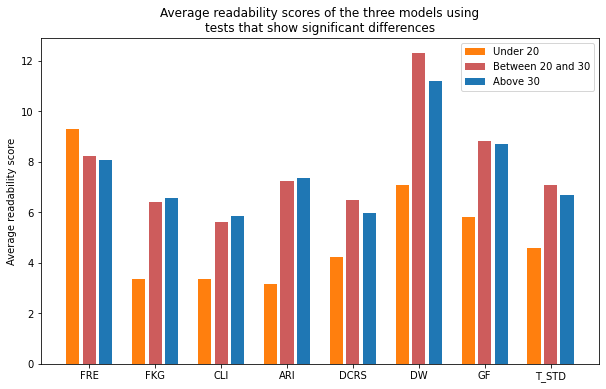

In [20]:
df_20_mean, df_2030_mean, df_30_mean = [], [], []

for t in test_names:
    if significance_result[t][1] == True:
        # As the Flesch Reading Ease (fre) scores have a wider
        # range compared to the others, they have been divided
        # by 10 after computing the average scores for the 
        # convenience of plotting
        if t == 'fre':
            df_20_mean.append(df_20[t].mean()/10)
            df_2030_mean.append(df_2030[t].mean()/10)
            df_30_mean.append(df_30[t].mean()/10)
        else:
            df_20_mean.append(df_20[t].mean())
            df_2030_mean.append(df_2030[t].mean())
            df_30_mean.append(df_30[t].mean())

labels = ['FRE', 'FKG', 'CLI', 'ARI', 'DCRS', 'DW', 'GF', 'T_STD']
x = np.arange(len(labels)) # the label locations 
width = 0.25

# Plot the average scores
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, df_20_mean, 0.2, 
        color = 'tab:orange', label='Under 20')
ax.bar(x, df_2030_mean, 0.2, 
        color = 'indianred', label='Between 20 and 30')
ax.bar(x + width, df_30_mean, 0.2, 
        color = 'tab:blue', label='Above 30')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylabel("Average readability score")
ax.set_title("Average readability scores of the three models using\n"
             "tests that show significant differences")
plt.show()

### Note:
Comparison across the scoring tests of the different standards shown above is meaningless (for example, comparing the FKG score of the same model with its FRE score) as they are calculated using different formulas and have different scales. The plot above is intended for comparing the three models' scores **within the same test**.

As shown in the plot above, there is not much difference between the average readability scores of the between-20-and-30 group and the above-30 group. Moreover, except for the FRE score ([Flesch Reading Ease](https://en.wikipedia.org/wiki/Flesch–Kincaid_readability_tests)), the group of under-20 has much lower scores compared to the others.

# VI. Final remarks

- It has been consistently shown in the example texts generated in Part III and the significance test on readability scores in Part IV that, compared to the other two models, the model trained using blogs written by people under 20 has poorer performance even though the **training data size is the same** for all three models. One of the possible reasons could be that people under 20 are more likely to use slangs and informal words such as "cuz" (or "cus") instead of "because" and "u" instead of "you", which makes it hard for the model to learn given the limited sample size. Moreover, it could be because that the writing styles and writing formats of people under 20 vary much more than those of the older groups.

- In addition to the three models presented here and their analysis above, our multi-batch-training attempt (as depicted in **(3.1.1) Multi Batch GPU-Under_20.ipynb** in folder `Multi Batch Trial`) also revealed potential issues regarding the training sample size. In case the reader chose to skip the notebook **(3.1.1) Multi Batch GPU-Under_20.ipynb**, here is the analysis and conclusion from there:

    As more subsets of data are fed into the model trained using previous subsets, the performance of the model has become worse (in terms of sentence structure and the context). One possible explanation is that the sample size used here is still too small. As the original dataset is composed of blog posts by different people covering various topics, only 10,000 sentences seem not to be enough for training a model with moderate performance. Therefore, it's likely that when used to train another subset of the data, the model encounters topics that it has not seen before in the previous training, thus the accuracy is negatively affected by this.

- After considering the above analysis and our observations of the data as well as the model performance, we believe the following steps in the future will be helpful in improving the modelling:
    - Increase the training data sample size.
    - Instead of training the model using separate sentences, try to use the entire paragraphs.
    - Use better methods for data cleaning: for example, as pointed out in **(2.1) Preprocessing-under 20** in folder `Initial processing`, some blogs of the dataset are not written in English. To solve this, we utilized a very simple filter to save time. However, in later model predictions, it was observed that non-English words are sometimes common in certain cases, indicating that our filter was not able to remove all the non-English texts.
    - Incorporate punctuations in the modelling. Not only will this help improve the texts' readability, it will also provide more convenience for further analysis (for example, the readability analysis in this notebook requires punctuations).
    - Consider using transfer learning and take advantage of the available powerful NLP models that have already been pretrained (e.g. [BERT](https://en.wikipedia.org/wiki/BERT_(language_model)))